In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Structure and File Handling

In [20]:
expenses = []

##Add Expense Function

In [172]:
from datetime import datetime

def isvalid_date(date):
    try:
        datetime.strptime(date, '%Y-%m-%d')
        return True
    except ValueError:
        return False

def Date():
    date = input("Enter date (YYYY-MM-DD) or press Enter for today: ")

    # if it is void or null entry then take it as today
    if not date :
        date = datetime.today().strftime('%Y-%m-%d')

    #check if it is valid or not
    elif not isvalid_date(date):
        print("Invalid date format. Please use format YYYY-MM-DD.")
        return Date()   # if not valid ask user again to put

    # again check if the date is not in future
    elif datetime.strptime(date, '%Y-%m-%d') > datetime.now():
        print("Date cannot be in the future.")
        return Date()

    # check if it is more than 100 years old (which is seems invalid)
    elif datetime.today().year - datetime.strptime(date, '%Y-%m-%d').year >= 10:
        print("Date seems unrealistic (it cannot be more than 10 years old)!")
        return Date()

    return date

def add_amount():
    amount = input("Enter amount: ₹")
    try:
        amount = float(amount)
        return amount
    except ValueError:
        print("Invalid amount. Please enter a valid number.")
        return add_amount()

def add_expense():

    category = str()
    while True:
        cat_choice = input("""
              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study
                    Enter you category: """)

        if cat_choice == '1':
            category = 'Food'
            break
        elif cat_choice == '2':
            category = 'Travel'
            break
        elif cat_choice == '3':
            category = 'Transport'
            break
        elif cat_choice == '4':
            category = 'Entertainment'
            break
        elif cat_choice == '5':
            category = 'Study'
            break
        else:
            print("Invalid choice! Try again.")

    amount = add_amount()
    date = Date()

    expense = {'amount': amount, 'category': category, 'date': date}
    expenses.append(expense)
    print("Expense added successfully!")


## Delete some data

In [174]:
def delete_expense():
    # """Remove one or more expenses that match a given date + category."""
    if not expenses:
        print("No expenses recorded yet.")
        return

    # Date() helper for validation
    date_to_del = Date()
    cat_to_del = input("Enter category to delete from: ").strip()

    # Find indices of matching rows
    matches = [
        idx for idx, exp in enumerate(expenses)
        if exp["date"] == date_to_del and exp["category"].lower() == cat_to_del.lower()
    ]

    if not matches:
        print("No expense found for that date and category.")
        return

    # If more than one match, let the user choose
    if len(matches) > 1:
        print("\nMatching expenses:")
        for i, idx in enumerate(matches, start=1):
            e = expenses[idx]
            print(f"{i}. ₹{e['amount']:.2f}  |  {e['category']}  |  {e['date']}")
        sel = input("Enter number to delete (or 'a' to delete *all*): ").strip()

        if sel.lower() == "a":
            for idx in sorted(matches, reverse=True):
                expenses.pop(idx)
            print("All matching expenses deleted.")
        else:
            try:
                choice = int(sel)
                expenses.pop(matches[choice - 1])
                print("Expense deleted.")
            except (ValueError, IndexError):
                print("Invalid selection — nothing deleted.")
    else:
        expenses.pop(matches[0])
        print("Expense deleted.")


## Save & Load from File

In [157]:
import json
from datetime import date, datetime


def save_expenses(filename="expenses.json"):
    with open(filename, "w") as f:
        # Convert datetime objects to strings before saving
        serializable_expenses = []
        for exp in expenses:
            exp_copy = exp.copy()
            if isinstance(exp_copy.get('date'), datetime):
                exp_copy['date'] = exp_copy['date'].strftime('%Y-%m-%d')
            serializable_expenses.append(exp_copy)
        json.dump(serializable_expenses, f)

def load_expenses(filename="expenses.json"):
    global expenses
    try:
        with open(filename, "r") as f:
            expenses = json.load(f)
    except FileNotFoundError:
        expenses = []

## Visual summary

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## visual summary

def visual_summary():
  exp_data = pd.DataFrame(expenses)
  exp_data['date'] = pd.to_datetime(exp_data['date'], errors='coerce')
  exp_data = exp_data.sort_values('date')

  plt.style.use('seaborn-v0_8-darkgrid') # Use a dark grid style for a more aesthetic look

  plt.figure(figsize=(10,6))
  # bar plot categpry wise expense and annotate
  category_wise = exp_data.groupby('category')['amount'].sum().reset_index()
  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')

  # annotate
  for i in range(len(category_wise)):

      plt.text(i, category_wise['amount'][i]+1.5, '$' + str(category_wise['amount'][i]), ha='center')
  plt.title("Category wise Expense",fontsize=20, fontweight="bold")
  plt.xlabel("Category",fontsize=18)
  plt.ylabel("Amount",fontsize=18)
  plt.ylim(0,category_wise['amount'].max()+100)
  plt.show()

  ### daiy wise expenses

  # Aggregate data by date and category
  daily_expenses = exp_data.groupby(['date', 'category'])['amount'].sum().reset_index()

  plt.figure(figsize=(13, 7)) # Increase figure size

  # Plot with Seaborn for enhanced aesthetics
  ax = sns.lineplot(data=daily_expenses, x='date', y='amount', hue='category', marker='o', palette='Paired', linewidth=2)

  # Annotate points
  for line in ax.lines:
    for x_val, y_val in zip(line.get_xdata(), line.get_ydata()):
      ax.annotate(f'{y_val:.0f}', (x_val, y_val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

  plt.title('Day-wise Expenses by Category', fontsize=20, fontweight='bold') # Make title bold
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Amount', fontsize=18)
  plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
  plt.grid(True) # Add a more subtle grid
  plt.tight_layout()

  plt.show()

  print("\nWant to see as table?? press 'Y' for yes else press any other key: ")
  ch = input()
  if ch == 'Y' or ch == 'y':
    exp_data= exp_data.reset_index(drop=True)
    display(exp_data)
  return



##View Summary

In [163]:
from collections import defaultdict

def view_summary():

    summary = defaultdict(float)
    total = 0.0

    # to track all kind of spending
    max_spending = 0.0
    max_spending_date = None
    max_spending_category = None

    min_spending = float('inf')
    min_spending_date = None
    min_spending_category = None

    for exp in expenses:
        summary[exp['category']] += exp['amount']
        total += exp['amount']

        # record of max spending
        if exp['amount'] > max_spending:
            max_spending = exp['amount']
            max_spending_date = exp['date']
            max_spending_category = exp['category']

        # recored of minimum spending
        if exp['amount'] < min_spending:
            min_spending = exp['amount']
            min_spending_date = exp['date']
            min_spending_category = exp['category']

    print("\nSummary by Category:")
    for cat, amt in summary.items():
        print(f"{cat}: ₹{amt:.2f}")

    print(f"Total spending: ₹{total:.2f}")
    if total ==0:
      return

    print(f"\nAverage spending per day: ₹{total/len(expenses):.2f}")
    print(f"Maximum spending: amount: ₹{max_spending:.2f} , category: {max_spending_category} , date: {max_spending_date}")
    print(f"Minimum spending: amount: ₹{min_spending:.2f} , category: {min_spending_category} , date: {min_spending_date}")
    print(f"Number of expenses: {len(expenses)}")


    print("\nwant more visual summary!!\nPress 'Y' for that")
    choice = input()
    if choice == 'Y' or choice=='y':
        visual_summary()
    return


## Menu System


----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹566.00
Food: ₹712.00
Entertainment: ₹415.00
Transport: ₹1308.00
Study: ₹320.00
Total spending: ₹3321.00

Average spending per day: ₹221.40
Maximum spending: amount: ₹1000.00 , category: Transport , date: 2023-08-11
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 15

want more visual summar!!
Press 'Y' for that
Y


/tmp/ipython-input-171-1977078056.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


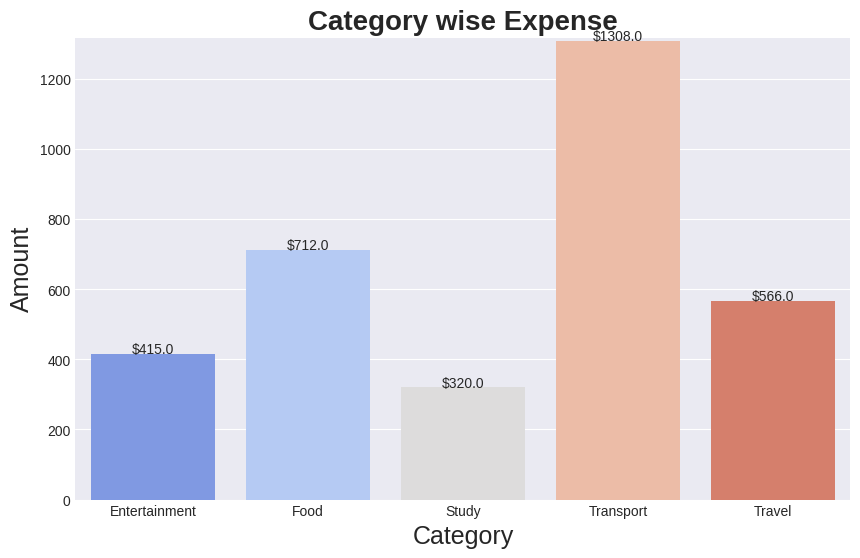

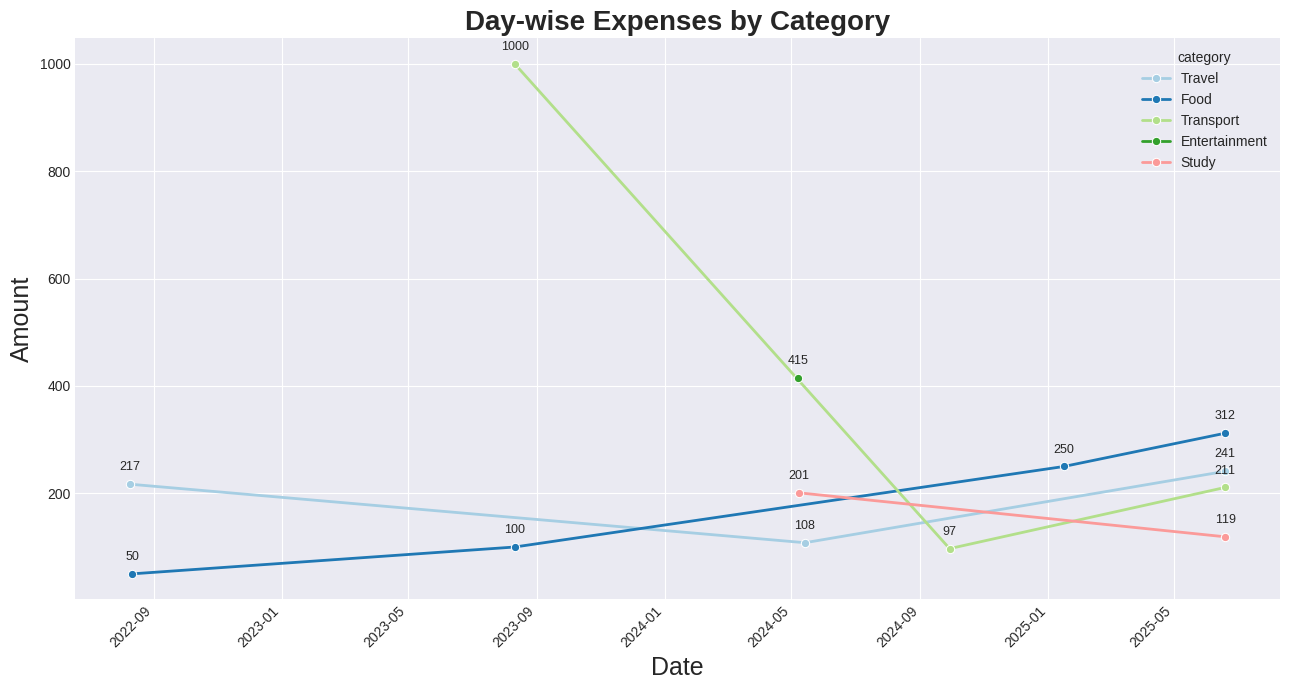


Want to see as table?? press 'Y' for yes else press any other key: 
y


,amount,category,date
0,107.0,Travel,2022-08-09
1,110.0,Travel,2022-08-09
3,50.0,Food,2022-08-11
2,100.0,Food,2023-08-11
14,1000.0,Transport,2023-08-11
4,415.0,Entertainment,2024-05-07
10,201.0,Study,2024-05-08
12,108.0,Travel,2024-05-14
9,97.0,Transport,2024-09-29
7,250.0,Food,2025-01-16



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 3
Enter date (YYYY-MM-DD) or press Enter for today: 2023-8888
Invalid date format. Please use format YYYY-MM-DD.
Enter date (YYYY-MM-DD) or press Enter for today: 2011-09-01
Date seems unrealistic (it cannot be more than 10 years old)!
Enter date (YYYY-MM-DD) or press Enter for today: 2023-08-11
Enter category to delete from: transport
Expense deleted.

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹566.00
Food: ₹712.00
Entertainment: ₹415.00
Transport: ₹308.00
Study: ₹320.00
Total spending: ₹2321.00

Average spending per day: ₹165.79
Maximum spending: amount: ₹415.00 , category: Entertainment , date: 2024-05-07
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 14

want more visual summar!!
Press 'Y' for that
y


/tmp/ipython-input-171-1977078056.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


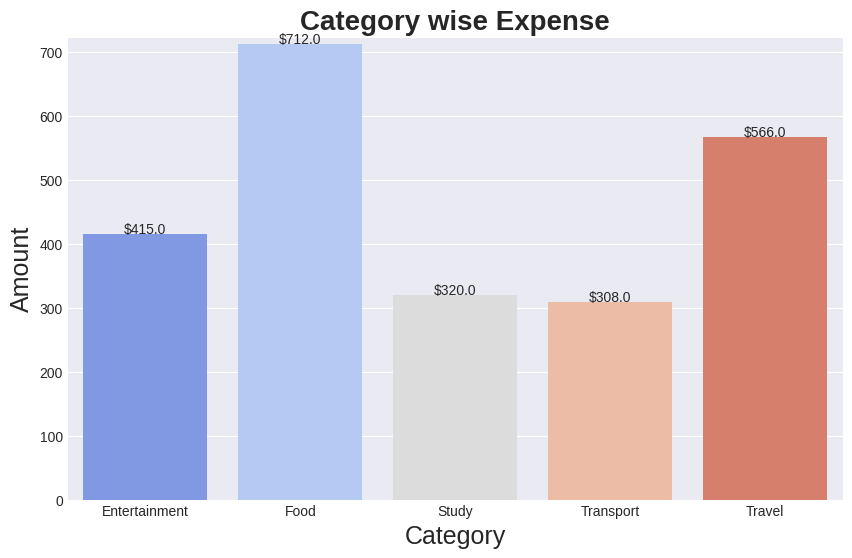

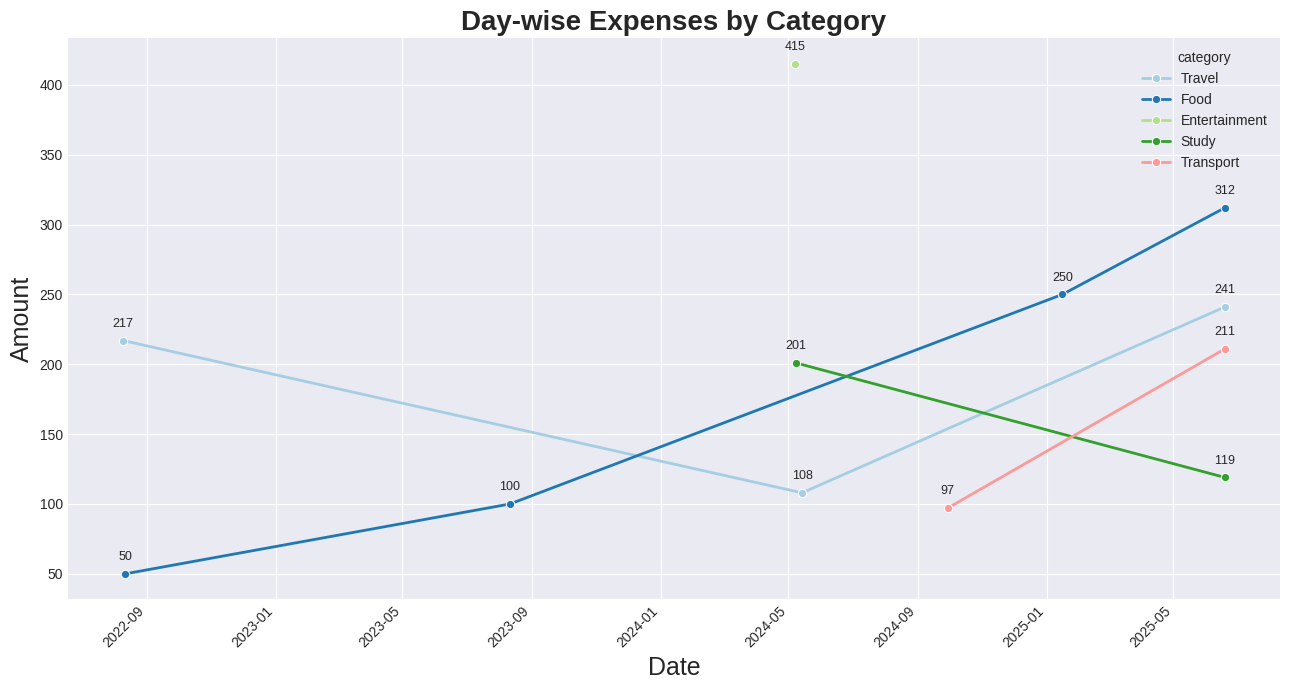


Want to see as table?? press 'Y' for yes else press any other key: 
y


,amount,category,date
0,107.0,Travel,2022-08-09
1,110.0,Travel,2022-08-09
3,50.0,Food,2022-08-11
2,100.0,Food,2023-08-11
4,415.0,Entertainment,2024-05-07
10,201.0,Study,2024-05-08
12,108.0,Travel,2024-05-14
9,97.0,Transport,2024-09-29
7,250.0,Food,2025-01-16
5,211.0,Transport,2025-06-19



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 3
Enter date (YYYY-MM-DD) or press Enter for today: jhu
Invalid date format. Please use format YYYY-MM-DD.
Enter date (YYYY-MM-DD) or press Enter for today: 2024-08-01
Enter category to delete from: jul
No expense found for that date and category.

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 4
Goodbye!


In [175]:
def main():
    load_expenses()
    while True:
        print("\n----- Expense Tracker -----")
        print("1. Add Expense")
        print("2. View Summary")
        print("3. Delete Expense")
        print("4. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            add_expense()
            save_expenses()
        elif choice == '2':
            view_summary()
        elif choice == '3':
            delete_expense()
            save_expenses()
        elif choice == '4':
            save_expenses()
            print("Goodbye!")
            break
        else:
            print("Invalid choice! Try again.")

main()



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹566.00
Food: ₹712.00
Entertainment: ₹415.00
Transport: ₹308.00
Study: ₹320.00
Total spending: ₹2321.00

Average spending per day: ₹165.79
Maximum spending: amount: ₹415.00 , category: Entertainment , date: 2024-05-07
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 14

want more visual summar!!
Press 'Y' for that
y


/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


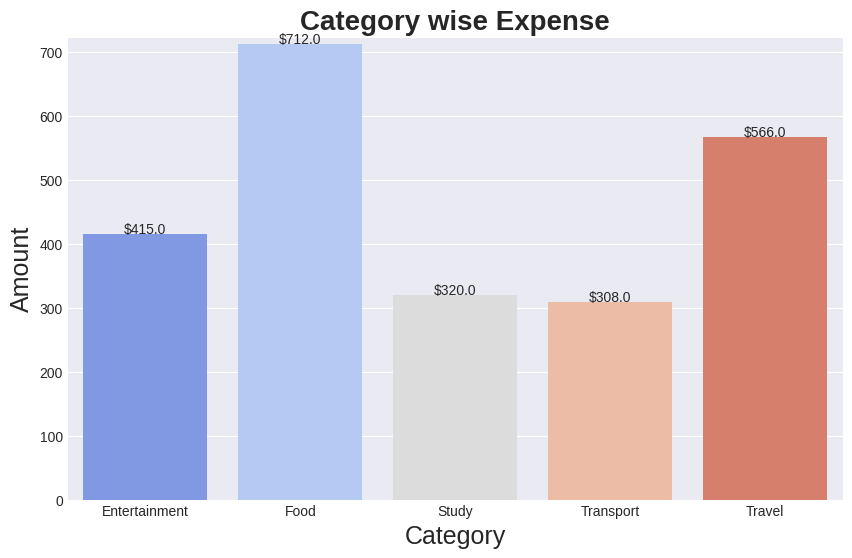

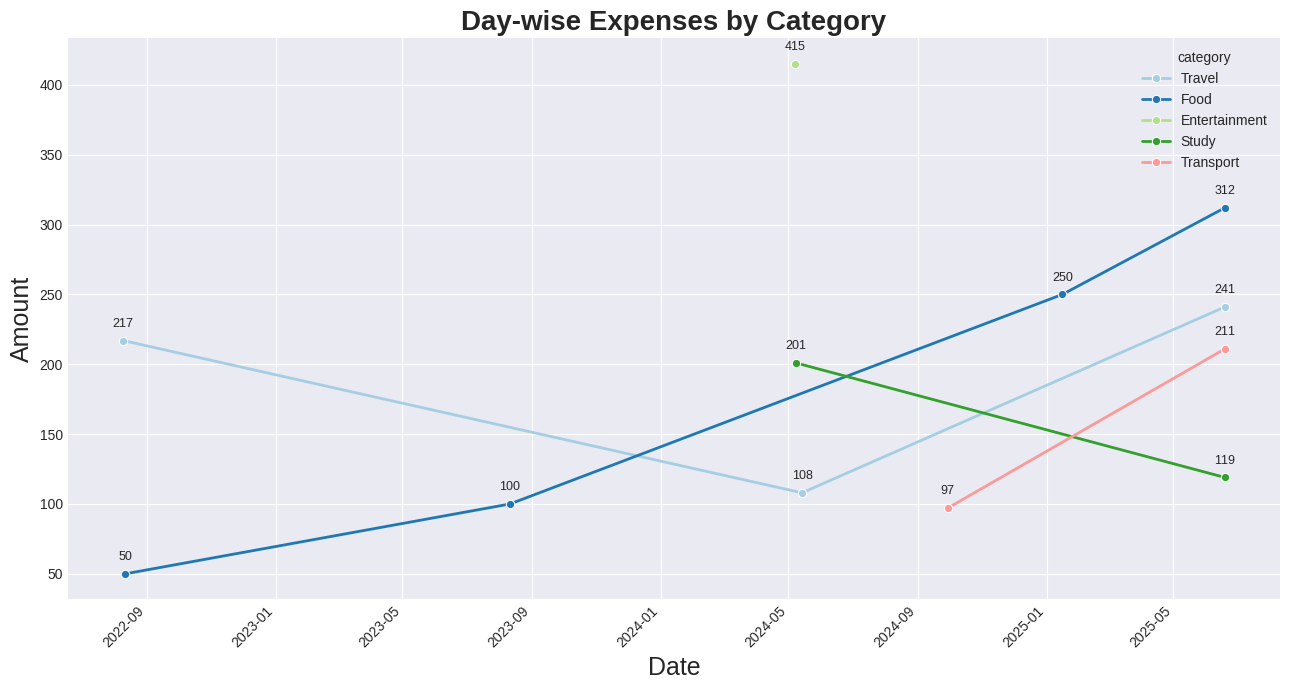


Want to see as table?? press 'Y' for yes else press any other key: 
y


,amount,category,date
0,107.0,Travel,2022-08-09
1,110.0,Travel,2022-08-09
2,50.0,Food,2022-08-11
3,100.0,Food,2023-08-11
4,415.0,Entertainment,2024-05-07
5,201.0,Study,2024-05-08
6,108.0,Travel,2024-05-14
7,97.0,Transport,2024-09-29
8,250.0,Food,2025-01-16
9,211.0,Transport,2025-06-19



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 2
Enter amount: ₹190
Enter date (YYYY-MM-DD) or press Enter for today: 
Expense added successfully!

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹756.00
Food: ₹712.00
Entertainment: ₹415.00
Transport: ₹308.00
Study: ₹320.00
Total spending: ₹2511.00

Average spending per day: ₹167.40
Maximum spending: amount: ₹415.00 , category: Entertainment , date: 2024-05-07
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 15

want more visual summar!!
Press 'Y' for that
y


/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


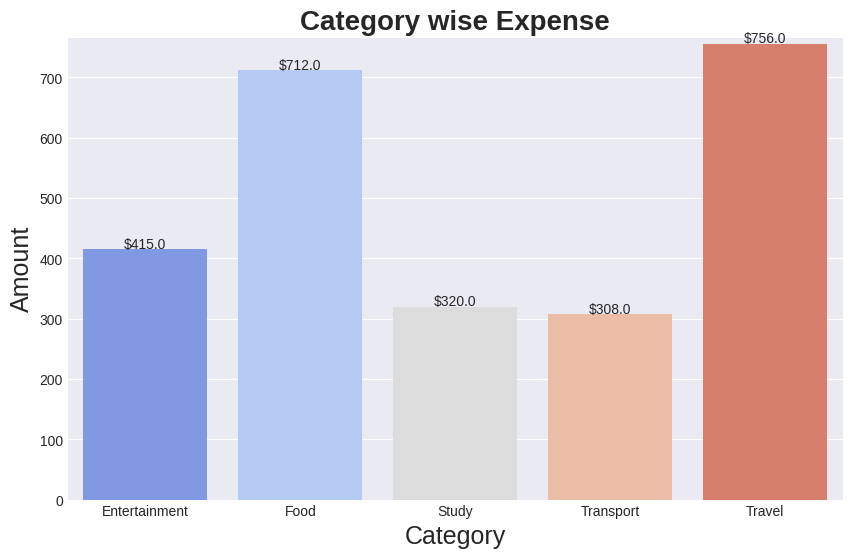

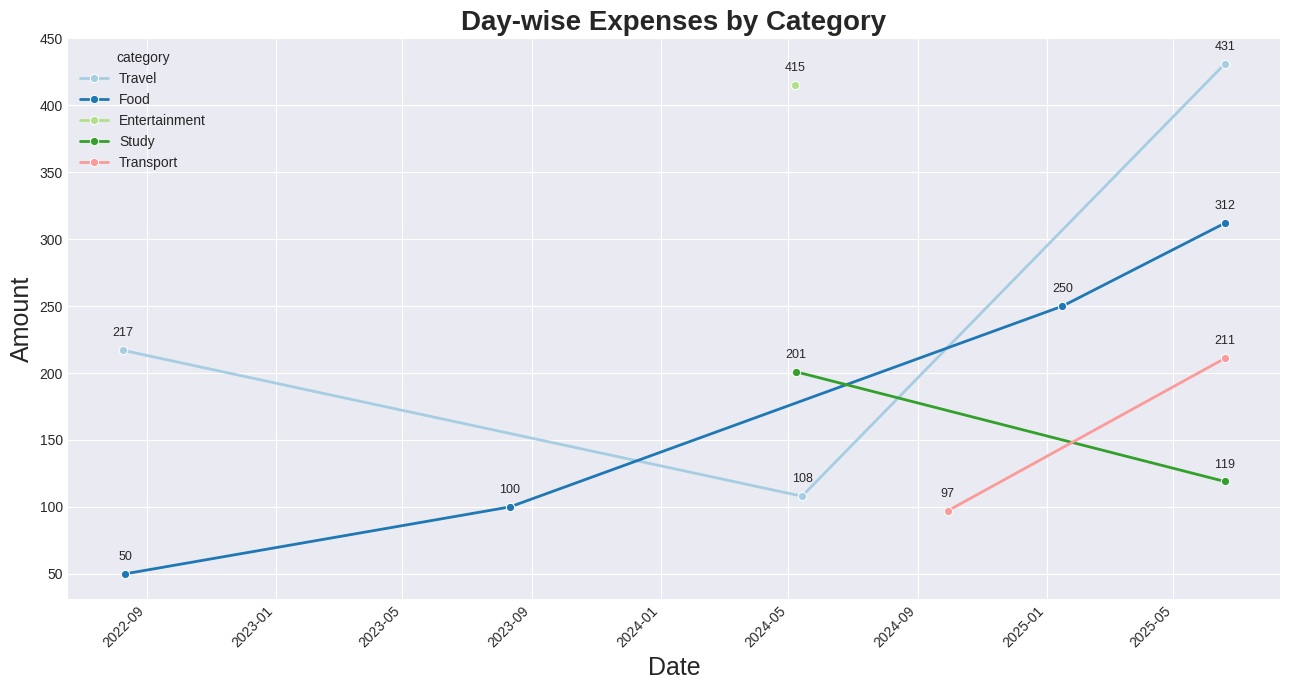


Want to see as table?? press 'Y' for yes else press any other key: 
4

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 4
Enter amount: ₹301
Enter date (YYYY-MM-DD) or press Enter for today: 2022-12-18
Expense added successfully!

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 4
Enter amount: ₹204
Enter date (YYYY-MM-DD) or press Enter for today: 2024-01-06
Expense added successfully!

----- Expense Tracker --

/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


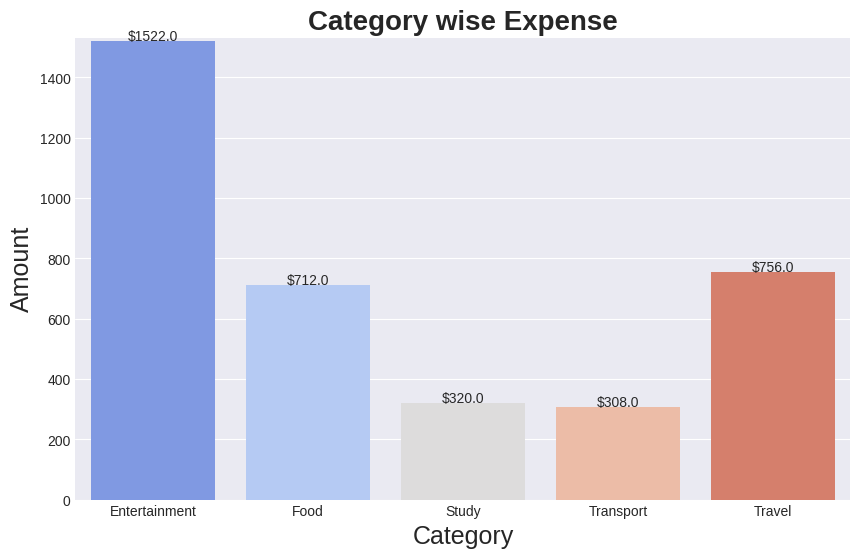

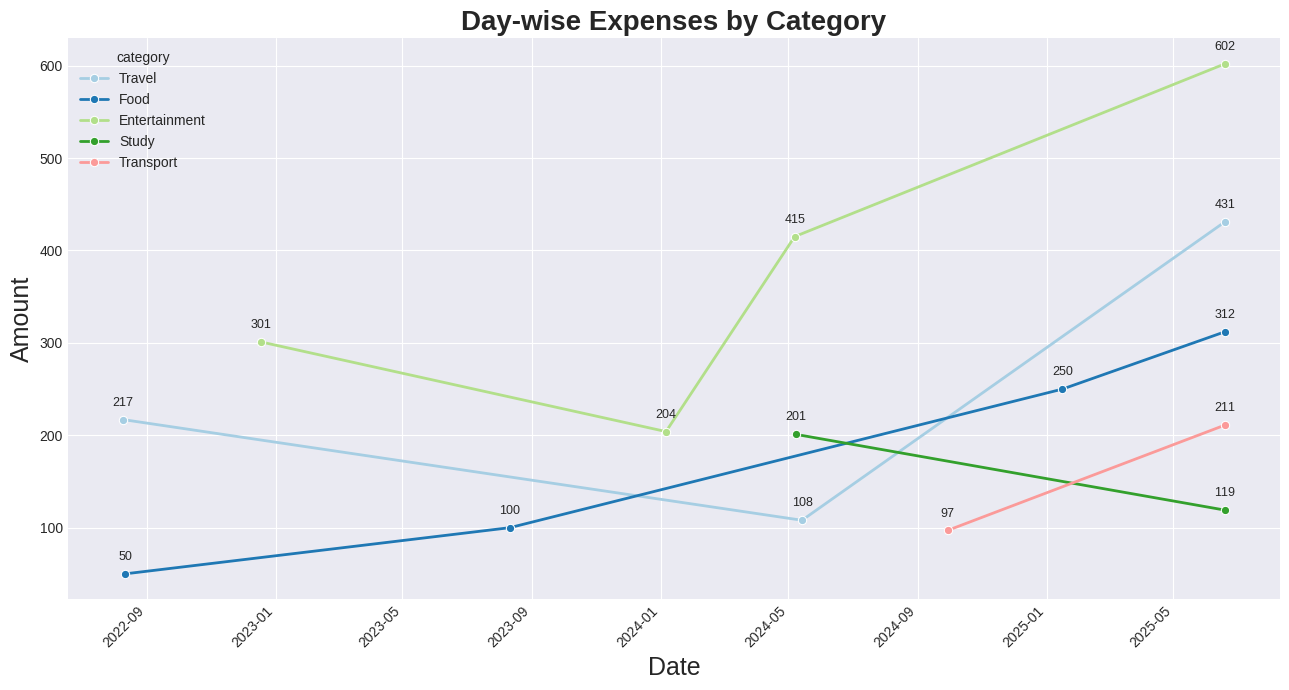


Want to see as table?? press 'Y' for yes else press any other key: 
y


,amount,category,date
0,107.0,Travel,2022-08-09
1,110.0,Travel,2022-08-09
2,50.0,Food,2022-08-11
3,301.0,Entertainment,2022-12-18
4,100.0,Food,2023-08-11
5,204.0,Entertainment,2024-01-06
6,415.0,Entertainment,2024-05-07
7,201.0,Study,2024-05-08
8,108.0,Travel,2024-05-14
9,97.0,Transport,2024-09-29



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 5
Enter amount: ₹49
Enter date (YYYY-MM-DD) or press Enter for today: 2022-01-01
Expense added successfully!

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 3
Enter amount: ₹166
Enter date (YYYY-MM-DD) or press Enter for today: 2023-01-30
Expense added successfully!

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your 

/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


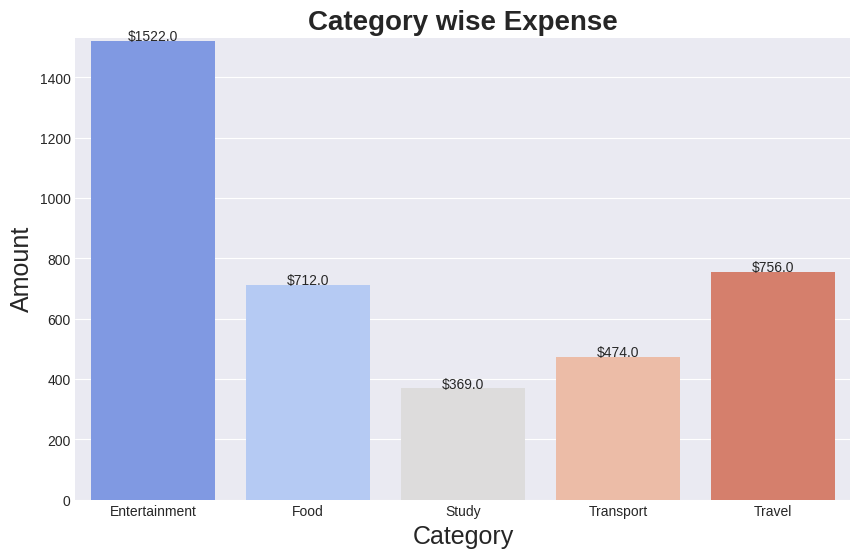

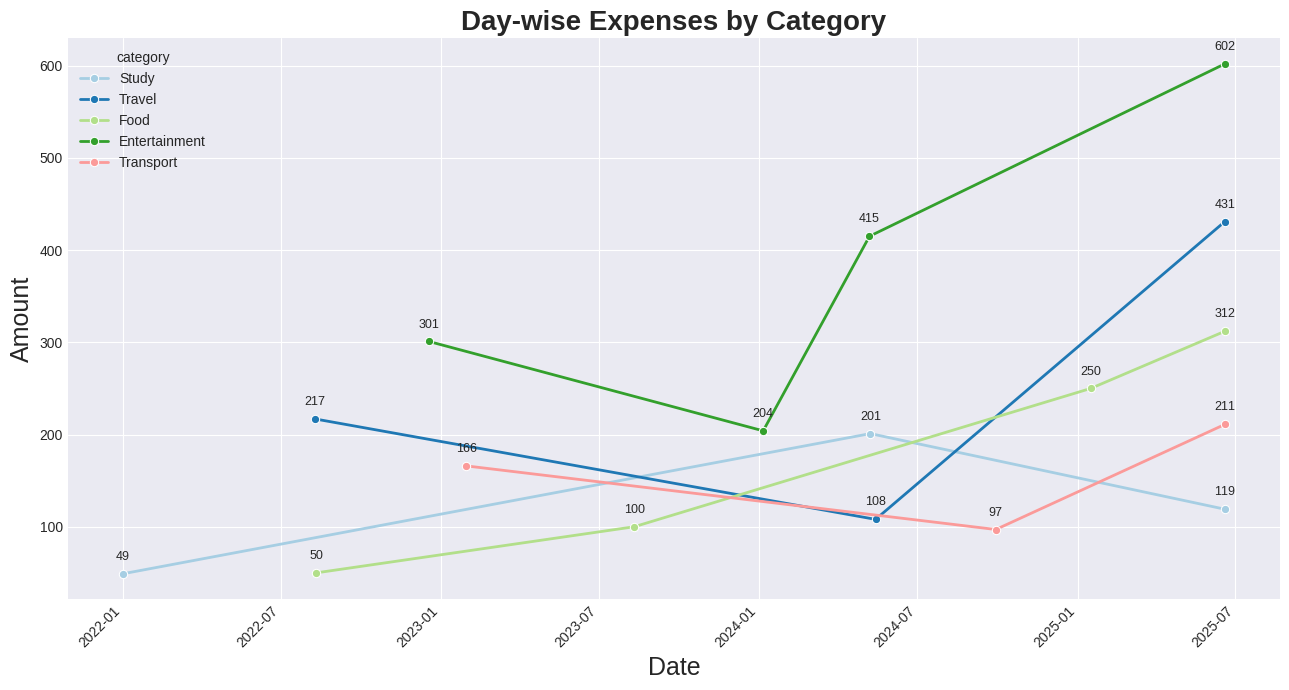


Want to see as table?? press 'Y' for yes else press any other key: 
a

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 1

              ---Enter category----
                    1. Food
                    2. Travel
                    3. Transport
                    4. Entertainment
                    5. study 
                    Enter you category: 5
Enter amount: ₹298
Enter date (YYYY-MM-DD) or press Enter for today: 2022-10-14
Expense added successfully!

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹756.00
Food: ₹712.00
Entertainment: ₹1522.00
Transport: ₹474.00
Study: ₹667.00
Total spending: ₹4131.00

Average spending per day: ₹196.71
Maximum spending: amount: ₹602.00 , category: Entertainment , date: 2025-06-19
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 21

want more visual summar!!
P

/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


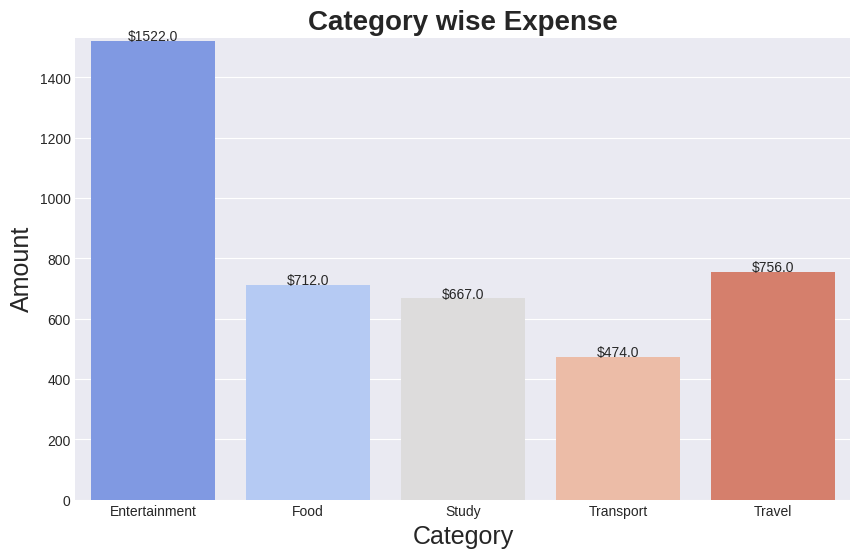

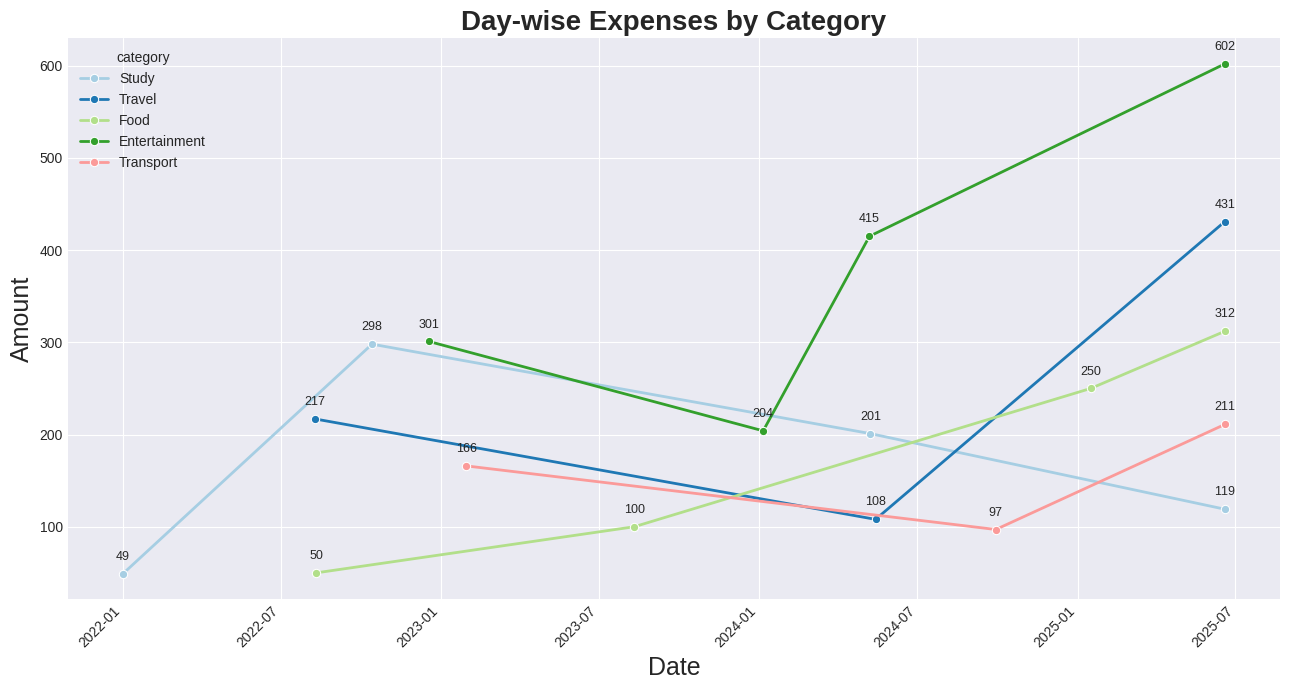


Want to see as table?? press 'Y' for yes else press any other key: 
y


,amount,category,date
0,49.0,Study,2022-01-01
1,107.0,Travel,2022-08-09
2,110.0,Travel,2022-08-09
3,50.0,Food,2022-08-11
4,298.0,Study,2022-10-14
5,301.0,Entertainment,2022-12-18
6,166.0,Transport,2023-01-30
7,100.0,Food,2023-08-11
8,204.0,Entertainment,2024-01-06
9,415.0,Entertainment,2024-05-07



----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 3
Enter date (YYYY-MM-DD) or press Enter for today: 2022-10-14
Enter category to delete from: STudY
Expense deleted.

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹756.00
Food: ₹712.00
Entertainment: ₹1522.00
Transport: ₹474.00
Study: ₹369.00
Total spending: ₹3833.00

Average spending per day: ₹191.65
Maximum spending: amount: ₹602.00 , category: Entertainment , date: 2025-06-19
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 20

want more visual summar!!
Press 'Y' for that
y


/tmp/ipython-input-176-3087535028.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


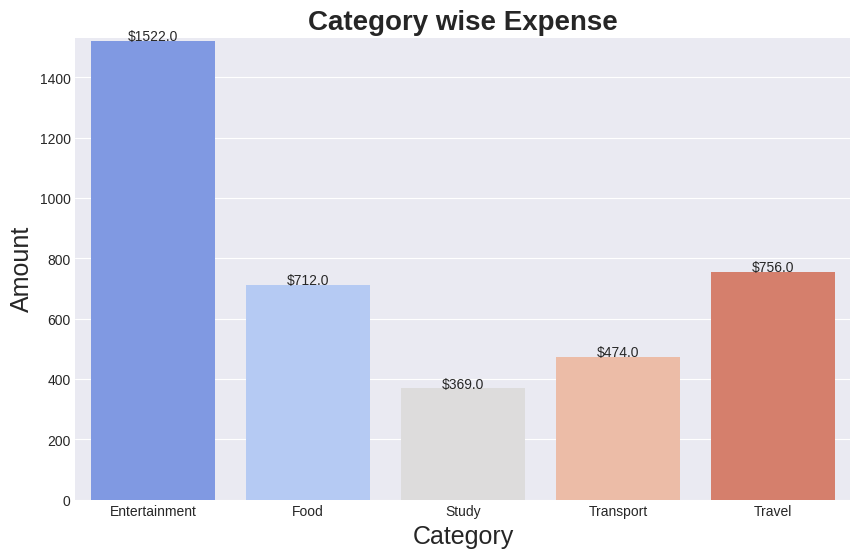

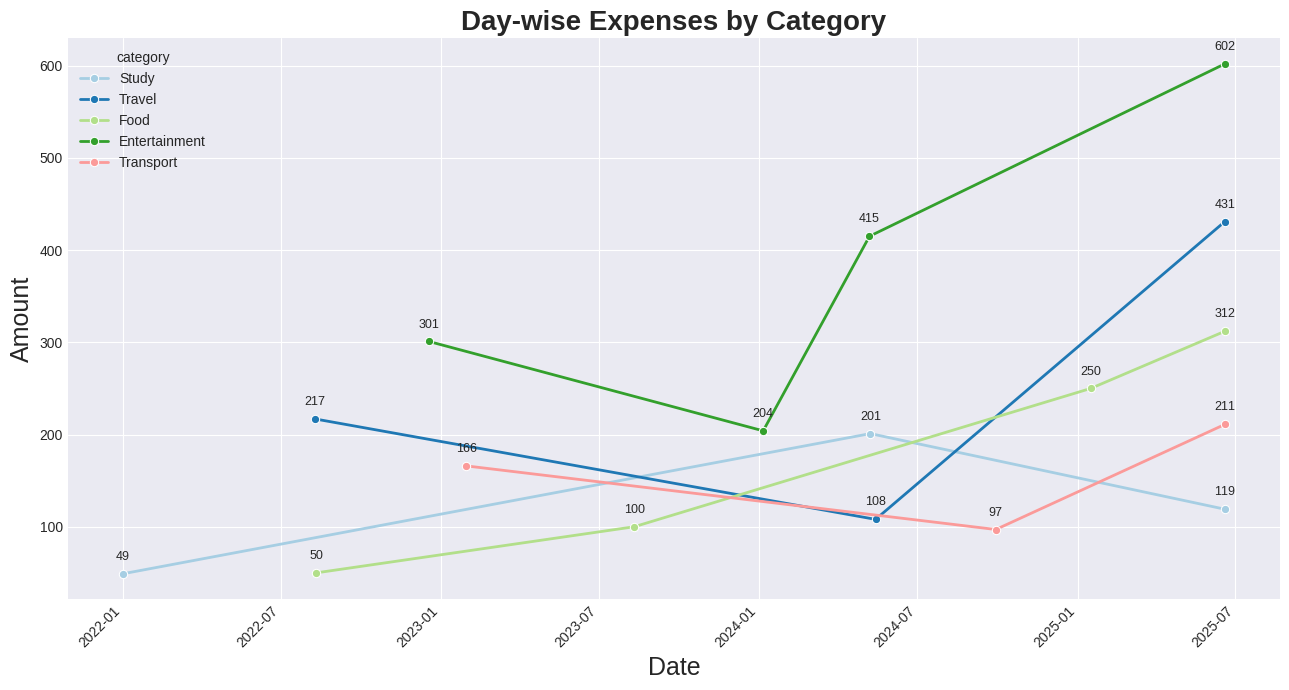


Want to see as table?? press 'Y' for yes else press any other key: 
4

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 4
Goodbye!


In [177]:
main()


----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 2

Summary by Category:
Travel: ₹756.00
Food: ₹712.00
Entertainment: ₹1522.00
Transport: ₹474.00
Study: ₹369.00
Total spending: ₹3833.00

Average spending per day: ₹191.65
Maximum spending: amount: ₹602.00 , category: Entertainment , date: 2025-06-19
Minimum spending: amount: ₹18.00 , category: Study , date: 2025-06-19
Number of expenses: 20

want more visual summar!!
Press 'Y' for that
y


/tmp/ipython-input-178-3099080846.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_wise, x='category',y='amount', palette='coolwarm')


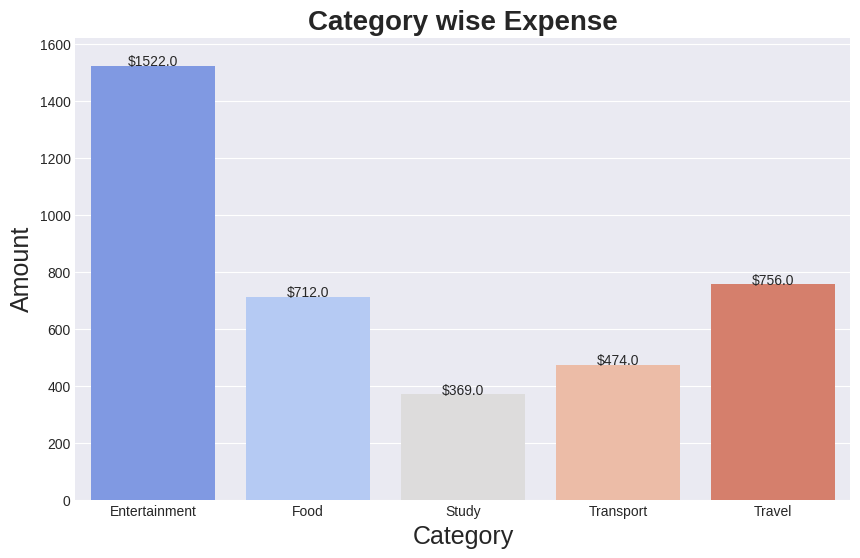

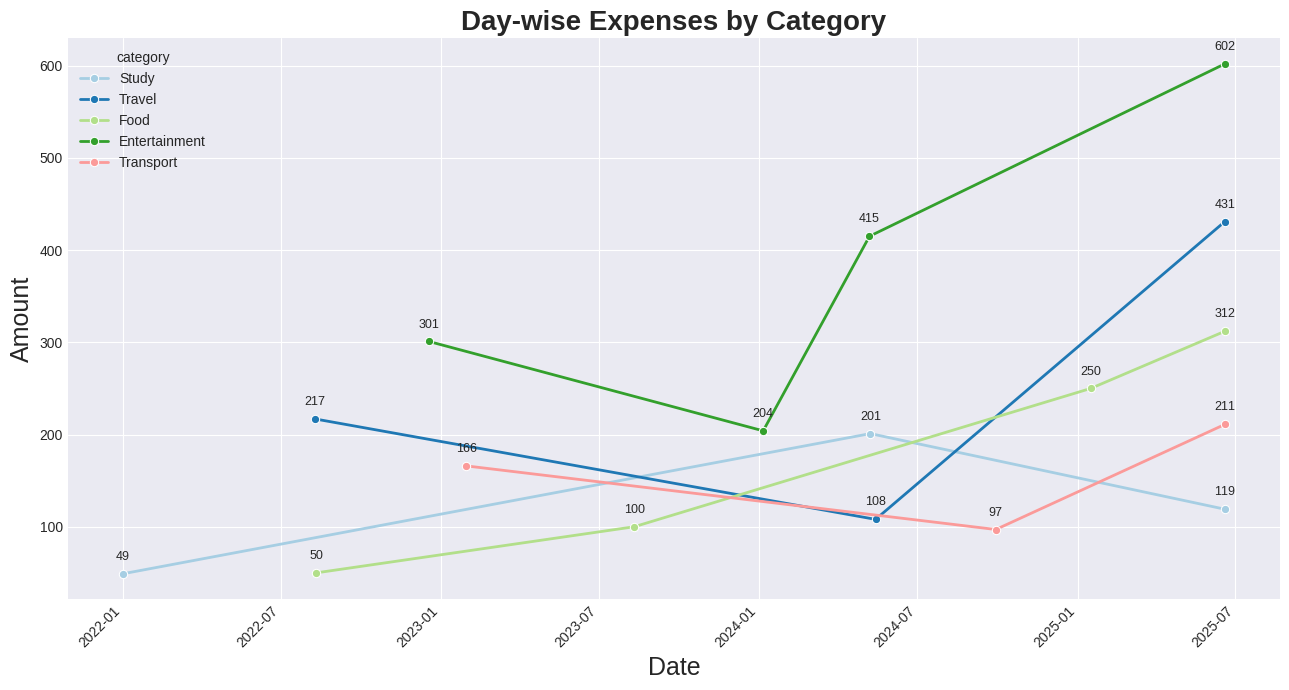


Want to see as table?? press 'Y' for yes else press any other key: 
l

----- Expense Tracker -----
1. Add Expense
2. View Summary
3. Delete Expense
4. Exit
Enter your choice: 4
Goodbye!


In [179]:
main()